<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons Licence" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">COMP5611M - Linear Regression by Ordinary Least Squares</span> by <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Marc de Kamps and University of Leeds</span> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.

## Linear Regression

### Ordinary Least Squares

#### Introduction

The purpose of this notebook is to introduce the formulae relevant to linear regression, using least squares, and Bayesian linear regression and discuss its implementation in Python. In the first part of the notebook, we discuss Ordinary Least Squares (OLS) where we attempt to fit polynomials to data. We will introduce the design matrix and show how it can be populated by a data file containg CVS separated data points. We will fit different polynomials to the data using OLS. *This material should be familar from the Data Science module.*  In the second part, we will apply Bayesian linear regression to the same problem.

#### The Design Matrix

Assume we want to fit a polynomial to a data set. We will consider one dimensional measurement values first. A data set then consists of a set of pairs of numbers: $ \cup^N_{i=1} \left\{ (x_i, y_i) \right\}$. 

A third degree polynomial for example has the general
form:
$$
f(x) = a + bx + cx^2 + dx^3
$$
The objective of linear regression is to fit a polynomial of a given degree to a data set. This means that we want to find numbers $a, b, c, d$ such that in some sense when we apply $f(x)$ to data point $x_i$, the value will
be 'as close as possible' to the actual measured value $y_i$. Clearly the higher degree of the polynomial, the
more flexible our fit can be. This has to be balanced against the possibility of *overfitting*.

Ordinary Least Squares aims to minimise the sum of the squared residuals where the residual for data point $i$, $(x_i, y_i)$, is defined as:
$$
  r_i = y_i - f(x_i)
$$
Clearly the residu is dependent on the choice we've made for $a, b, c$ and $d$ and we want to find values such
that
$$
\sum_i r^2_i
$$ 
is minimal. The solution to this is well known and can be formulated in terms of the *design matrix*.

We rewrite our polynomial in a more general notation:
$$
f(x) = {\bf w}^T{\bf \phi}(x)
$$

This notation is shorthand for:
$$
f(x) = \sum^M_{i=1} w_i \phi^i(x)
$$
Here ${\bf \phi}$ is the vector:
$$
{\bf \phi}(x) = \left( \begin{array}{l} 1 \\ x \\ x^2 \\ x^3 \end{array} \right)
$$
whilst
$$
{\bf w} = \left( \begin{array}{l} a \\ b \\ c\\ d\end{array} \right)
$$
so that the matrix product ${\bf w}^T {\bf \phi}(x)$ works out as:
$$
{\bf w}^T{\bf \phi}(x) = \left( \begin{array}{llll} a & b & c & d \end{array} \right) \left( \begin{array}{l} 1 \\ x \\ x^2 \\ x^3 \end{array} \right) = a + bx + cx^2 + d x^3
$$
In this notebook we main the convention that $\phi^i$ is the $i$-th component of $N \times 1$ matrix  ${\bf \phi}$, whereas
$w_j$ is the $j$-th component of the $1 \times N$ matrix ${\bf w}^T$.

This notation has the advantage that it generalises to polynomials of any dimension. The degree of the polynomial that we regress to is $M$, in the example thus far $M=4$, but the notation extends trivially to any dimension. 

For each data point we have a column vector ${\bf \phi}(x_n)$. The *desigin matrix* is an $N \times M$ matrix whose
elements are given by $\Phi_{nj} = \phi_j(x_n)$ so that:
\begin{equation}
\Phi = \left( \begin{array}{cccc} \phi_0(x_1) & \phi_1(x_1) & \cdots & \phi_{M-1}(x_1) \\
                                  \phi_0(x_2) & \phi_1(x_2) & \cdots & \phi_{M-1}(x_2) \\ 
                                  \vdots      & \vdots      &        & \vdots          \\
                                  \phi_0(x_N) & \phi_1(x_N) & \cdots & \phi_{M-1}(x_N) \end{array}\right)
\end{equation}

As an example, we will read in a dataset that we want to fit by a linear function ($M=2$).


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [8,4]
plt.rcParams['figure.dpi']     = 200

import numpy as  np

with open('linnoise.dat') as f:
    lines = f.readlines()
    xs = [float(x.split(',')[0]) for x in lines]
    t  = [float(y.split(',')[1]) for y in lines]


Phi = np.array([np.power(xs,0),np.power(xs,1)]).T # for every degree of the polynomial we add a column to the design matrix

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [8,4]
plt.rcParams['figure.dpi']     = 200

import numpy as  np

with open('assessmentnoise.dat') as f:
    lines = f.readlines()
    xs = [float(x.split(',')[0]) for x in lines]
    t  = [float(y.split(',')[1]) for y in lines]


Phi = np.array([np.power(xs,0),np.power(xs,1)]).T # for every degree of the
xs, t

([0.07958414286873117,
  0.7892584980069763,
  0.7758010185025244,
  0.9101661556210074,
  0.9697713720037227,
  0.6055604146763733,
  -1.910309377071741,
  2.610794202017109,
  1.3286767254452325,
  -0.7298968815437106,
  -1.5377006386571268,
  0.6837932402208295,
  1.0454420060390075,
  1.959011401009509,
  -1.5053180151322785,
  2.684607314875838,
  -1.309218678534969,
  -1.5754284235354152,
  0.6609894160423817,
  -0.1768746090384714,
  -0.6457681878884818,
  1.5423641494809521,
  -0.23868015462573755,
  -1.1507993915974133,
  -0.26384345434598044,
  -0.5445994235108924,
  -0.6164031828002174,
  1.8771692520631729,
  -1.8370480477639215,
  -0.9651576835789681,
  -0.8175800736152592,
  0.5764069308710931,
  -1.9596174312675734,
  0.5027763842659398,
  -1.3642498851883045,
  -0.07397238409311546,
  -1.5202555746452755,
  1.2772578248166875,
  0.9079487151524761,
  -0.8424736696414845,
  2.408308986957297,
  -0.4088064437696648,
  0.4384305674462863,
  -0.29141367361160997,
  1.253233

The OLS solution is formally given by:
$$
{\bf w}_{ML} = ({\bf \Phi}^T{\bf \Phi})^{-1} {\bf \Phi}^T {\bf t}
$$

$t$ is the vector of values $y_i$, so an $N \times 1$ matrix:
$$
{\bf t} = \left( \begin{array}{c} y_1 \\ y_2 \\ \vdots \\ y_N \end{array} \right) 
$$
The quantity ${\bf \Phi}^{\dagger} \equiv ({\bf \Phi}^T{\bf \Phi})^{-1}{\bf \Phi}^T$ is known as the *Moore-Penrose pseudo-inverse*. 
It is the product  of an $M \times N$ and a $N  \times M$ matrix, so an $M \times M$ matrix, which
is inverted, and thereby remains an $M \times  M$ matrix, which is right multiplied by an $M \times N$ matrix,
so an $M \times N$ matrix. When this is applied to $N \times 1$ matrix (vector) ${\bf t}$, an $M \times 1$
matrix results, which contains the coefficients of the OLS polynomial.

This is *not* the recommend numerical solution which uses SVD decomposition to avoid numerical instabilities, but it often works.

In [3]:
Phi_dagger = np.linalg.inv(Phi.T.dot(Phi)).dot(Phi.T)
w = Phi_dagger.dot(t)
print(w)

[11.65889805 10.96742699]


This is the *MLE* of the weights. It is a single point in weight space, i.e. it identifies a unique line as best estimate.


It is straightforward to examine the results of the fit.

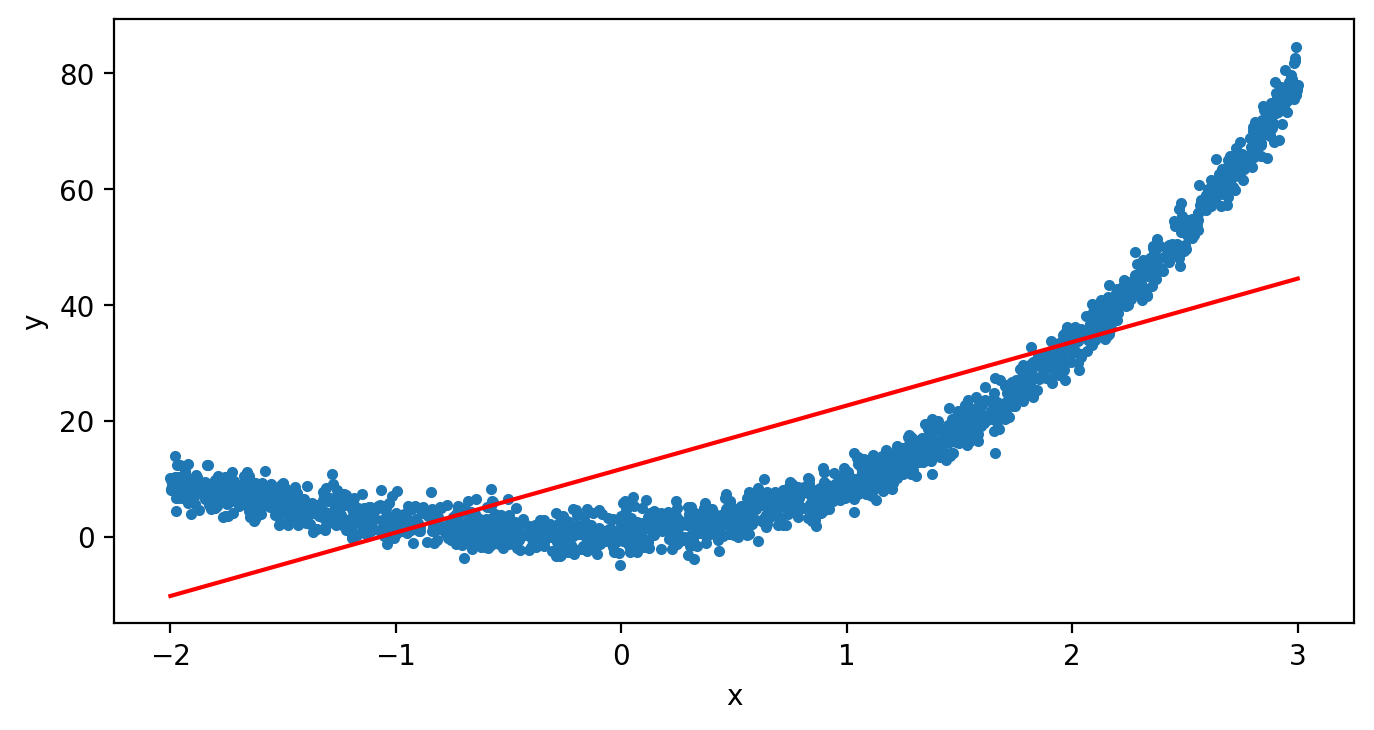

In [4]:
import matplotlib.pyplot as plt

x_min = np.min(xs)
x_max = np.max(xs)

x_fit = np.linspace(x_min,x_max,100)
y_fit = w[1]*x_fit + w[0]
plt.plot(xs,t,'.')
plt.plot(x_fit,y_fit,'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('linres.pdf')

Fitting a third order polynomial is a straightforward extension.

In [14]:
with open('assessmentnoise.dat') as f:
    lines = f.readlines()
    xs = [float(x.split(',')[0]) for x in lines]
    t  = [float(y.split(',')[1]) for y in lines]

n_degree = 3 # a cubic polynomial has four coefficients
Phi = np.array([np.power(xs,i) for i in range(n_degree)]).T


In [15]:
Phi_dagger = np.linalg.inv(Phi.T.dot(Phi)).dot(Phi.T)
w = Phi_dagger.dot(t)
print(w)

[-1.05219784  5.04536595  6.52121442]


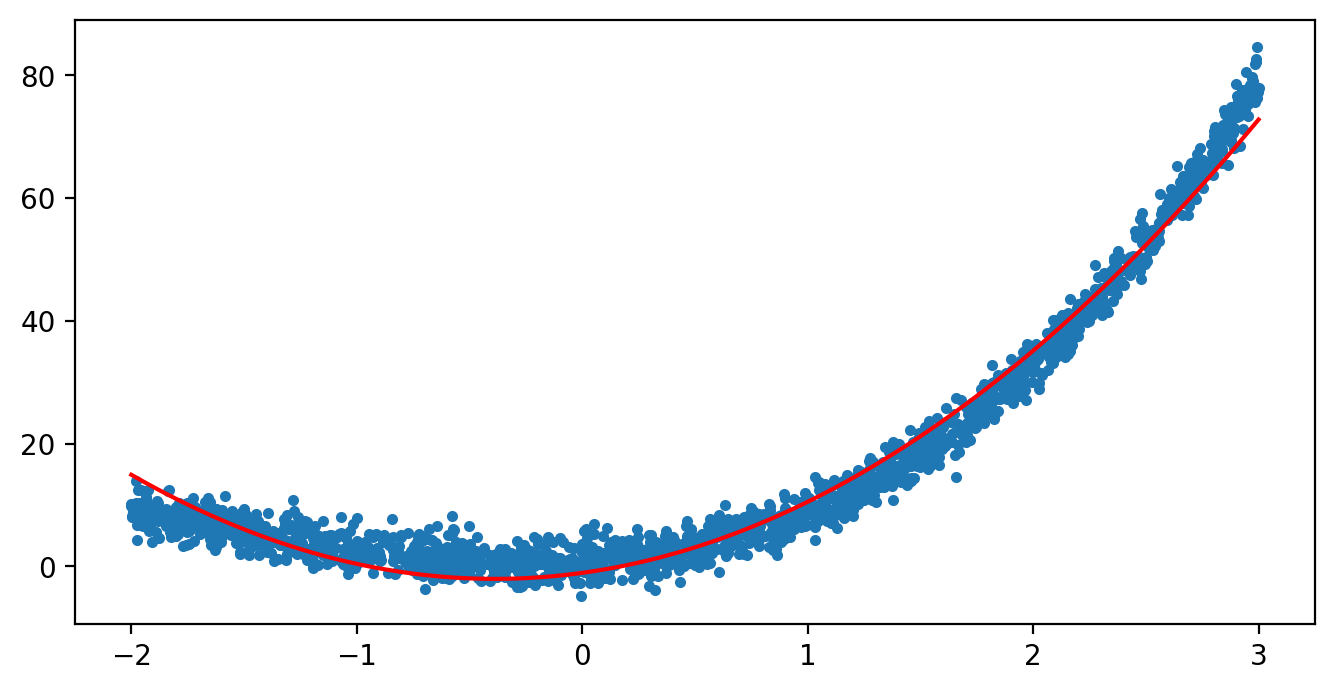

In [16]:
x_min = np.min(xs)
x_max = np.max(xs)

x_fit = np.linspace(x_min,x_max,100)

# this is what we want to do, but it is cluncky, you can uncomment to see it works, but it's better to use polyval

y_fit = np.polyval(np.flip(w),x_fit) # polyval applies w[0] to x**3, so w needs to be reversed

plt.plot(xs,t,'.')
plt.plot(x_fit,y_fit,'r-')
plt.savefig('cubic.pdf')

In [19]:
xxx = -3
y_fit = w[2]*xxx*xxx + w[1]*xxx + w[0]

y_fit

42.50263409304503

The results, by visual inspection, appear quite reasonable and the coefficents (weights) are neither small nor large.

### Overfitting

Let us revisit the linear dataset and fit a high order polynomial

In [7]:
with open('linnoise.dat') as f:
    lines = f.readlines()
    xs = [float(x.split(',')[0]) for x in lines]
    t  = [float(y.split(',')[1]) for y in lines]

n_degree = 2 # fit a polynomial of a given order

# just work on 10 points to better expose the effects of overfitting
n_red = 10
xsred = xs[:n_red]
tred  = t[:n_red]

Phi = np.array([np.power(xsred,i) for i in range(n_degree)]).T

Phi_dagger = np.linalg.inv(Phi.T.dot(Phi)).dot(Phi.T)
w = Phi_dagger.dot(tred)
print(w)


[-0.41096065  0.21777573]


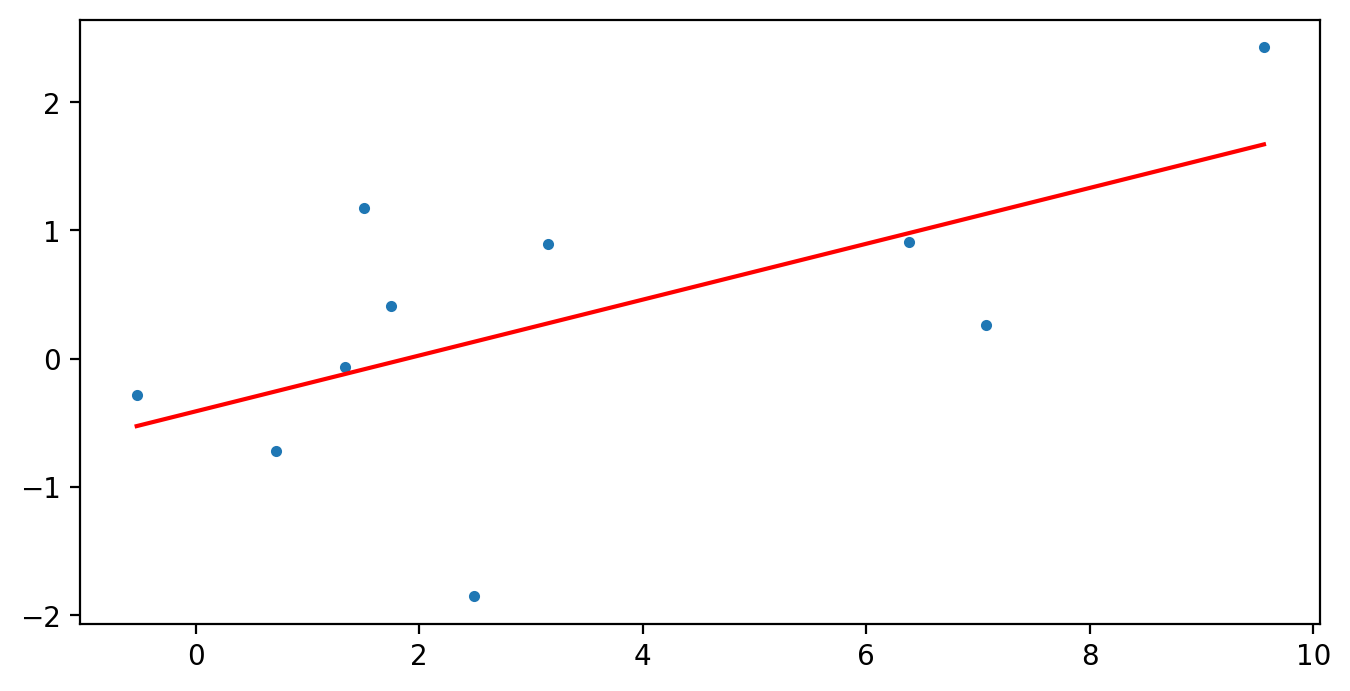

In [8]:
x_min = np.min(xsred)
x_max = np.max(xsred)


x_fit = np.linspace(x_min,x_max,100)
y_fit = np.polyval(np.flip(w),x_fit) 


plt.plot(xsred,tred,'.')
plt.plot(x_fit,y_fit,'r-')

Note how the linear fit is still appropriate, and approximately gives the same results on a small number of points. Now let's try the same for a high degree polynomial.

In [9]:
n_degree = 12 # fit a polynomial of a given order
Phi = np.array([np.power(xsred,i) for i in range(n_degree)]).T

Phi_dagger = np.linalg.inv(Phi.T.dot(Phi)).dot(Phi.T)
w = Phi_dagger.dot(tred)
print(w)

[ 1.87380285e+02 -3.37705140e+02 -3.80662600e+02  1.19619101e+03
 -9.95332100e+02  3.59879462e+02 -4.54468419e+01 -5.06950932e+00
  1.71247997e+00 -6.92111220e-02 -1.13332405e-02  8.07292469e-04]


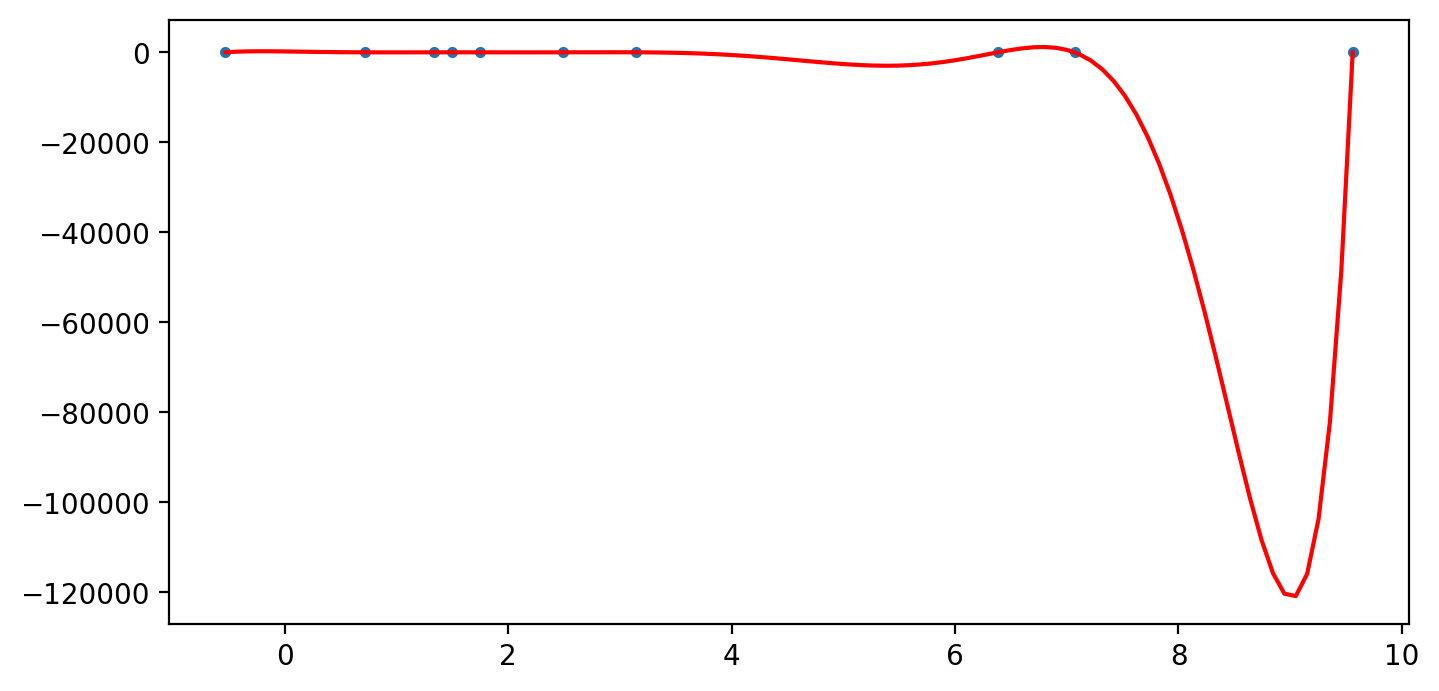

In [10]:
x_fit = np.linspace(x_min,x_max,100)
y_fit = np.polyval(np.flip(w),x_fit) 


plt.plot(xsred,tred,'.')
plt.plot(x_fit,y_fit,'r-')

The fit is good in the sense that it hits all data points with considerable accuracy, but the weights are huge, and the resulting polynomial is not representative of the underlying data at all. Note the large value of the coeefficients, suggesting that the higher order terms have a large influence in constraining the polynomial to the data. But large higher order terms in a polynomial imply a wildly fluctuating polynomial. This is quite visible!

Let's zoom in:

(-1.0, 5.0)

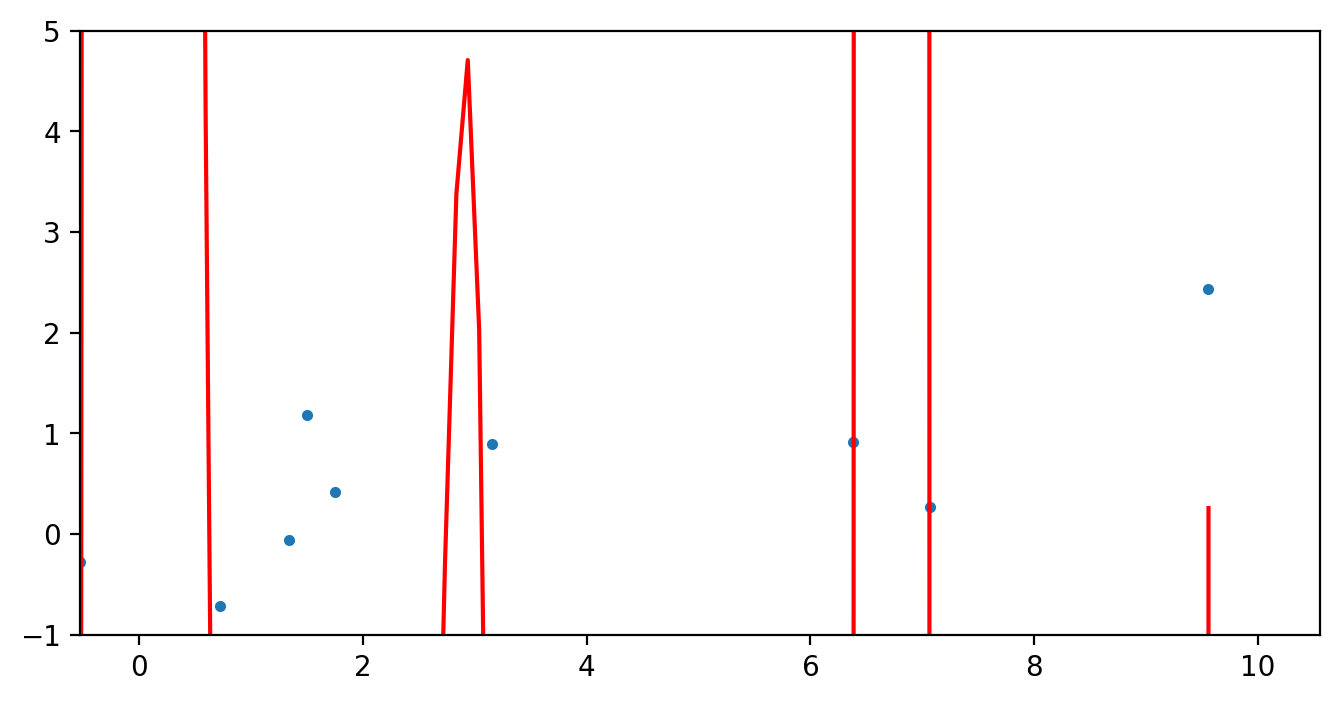

In [11]:
plt.plot(xsred,tred,'.')
plt.plot(x_fit,y_fit,'r-')
plt.xlim([x_min,x_max+1])
plt.ylim([-1.,5.])

The problem can be alleviated by using more data but:
1. There may not be more data. Here there is, but in general you may not be able to rerun an experiment or you will have to use existing study data. The central problem is machine learning and statistics is to make do with the data you have.
2. Even if you have more data, the resulting model is not necessarily better. We illustrate this below.

If the underlying deterministic process generates data according to a linear deterministic model, and the variability of the data is mainly due to noise, the higher order terms of the fit still adapt more to the noise than to the data, but the need to accommodate the larger dataset reduces their importance.

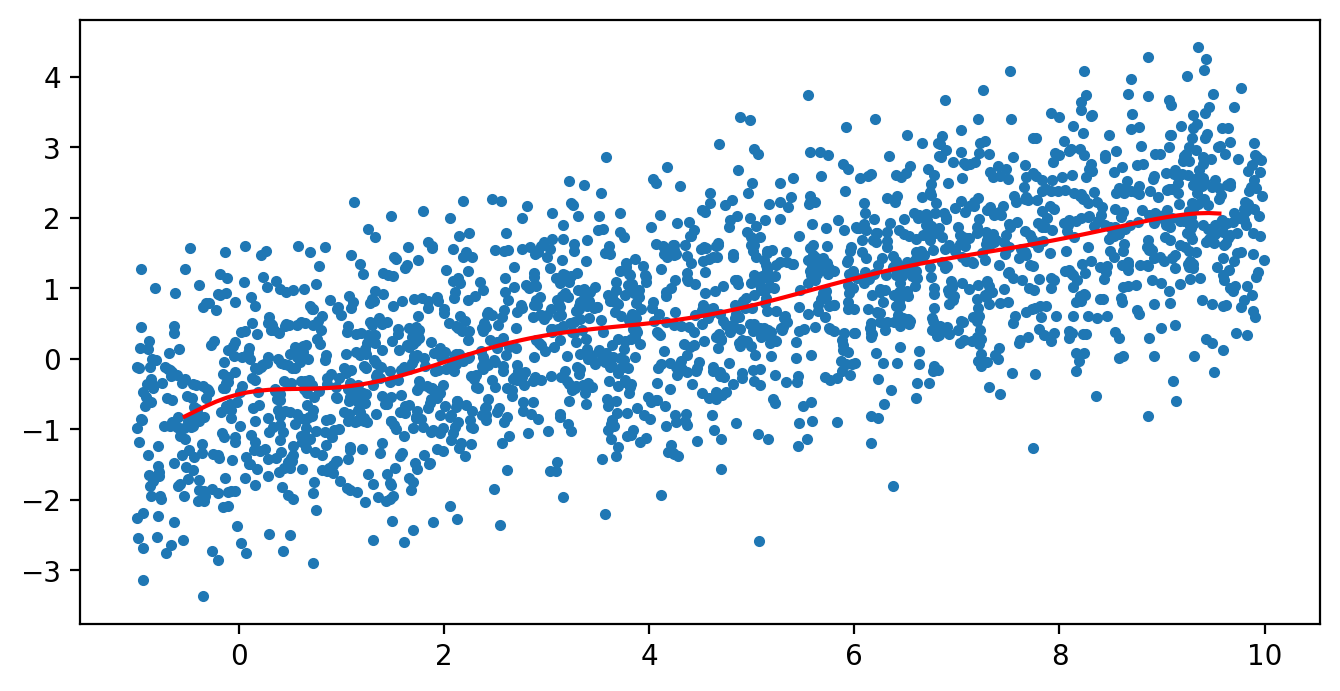

In [12]:
n_degree = 12 # fit a polynomial of a given order
Phi = np.array([np.power(xs,i) for i in range(n_degree)]).T

Phi_dagger = np.linalg.inv(Phi.T.dot(Phi)).dot(Phi.T)
w = Phi_dagger.dot(t)

x_fit = np.linspace(x_min,x_max,100)
y_fit = np.polyval(np.flip(w),x_fit)

plt.plot(xs,t,'.')
plt.plot(x_fit,y_fit,'r-')

The increased amount of data has *regularised* the polynomial, i.e. reduced the contribution of the higher order terms.

### Linear Regression on Other Basis Functions

We can create a number of Gaussian functions:
$\mu = 0, 1, \cdots, 10$ and use them as basis functions instead of polynomials.

The basis vectors $\phi$, then become:
$$
\boldsymbol{\phi}(x_i) = \left( \begin{array}{c} 1 \\ \mathcal{N}(x_i - 0, 1) \\ \mathcal{N}(x_i - 1,1) \\ \vdots \\ \mathcal{N}(x_i - 10,1) \end{array} \right)
$$


In [13]:
from scipy.stats import norm

with open('gaussnoise.dat') as f:
    lines = f.readlines()
    xs = [float(x.split(',')[0]) for x in lines]
    t  = [float(y.split(',')[1]) for y in lines]

Phi = np.array([norm.pdf(xs,i,1.0) for i in range(10)]).T

Phi_dagger = np.linalg.inv(Phi.T.dot(Phi)).dot(Phi.T)
w = Phi_dagger.dot(t)

print(w)

[-0.24445561  0.51646805  0.28590271  0.85402611 -0.92832888  0.87291147
  2.28727476  0.47829764 -0.22403324  0.08711412]


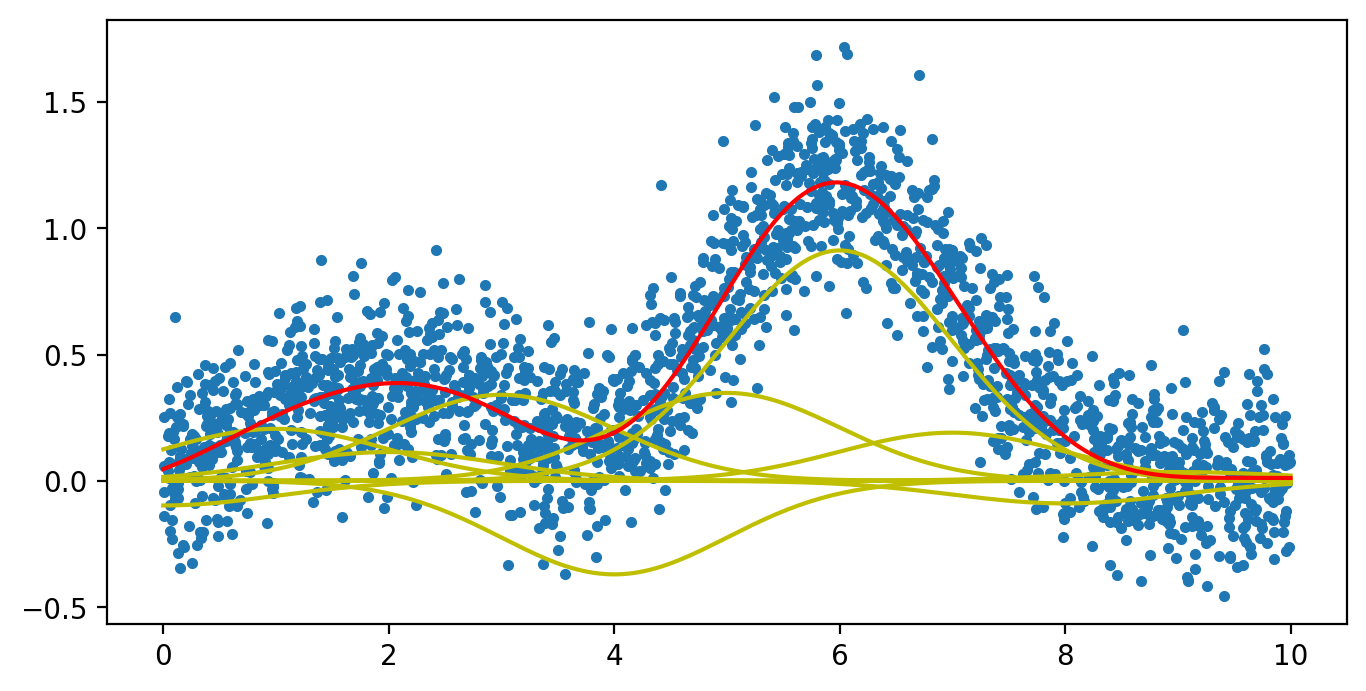

In [14]:
plt.plot(xs,t,'.')
x = np.linspace(0,10,200)
l=[w[i]*norm.pdf(x,i,1.0) for i in range(len(w))]
for g in l:
    plt.plot(x,g,'y-')
tot=sum(l)
plt.plot(x,tot,'r-')

The plot above shows all basis functions multiplied by their regression coefficient (yellow) and their sum (red). In this particular case, Gaussian functions provide an adequate set of basis functions.

**Exercise 1**

Research the linear regressor from scitkit-learn:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Adapt the example to perform the fit of *linnoise.dat*. What are the functions for setting the weight; training and evaluating the goodness of fit?

Do the coefficients compare?

[0.28880066]


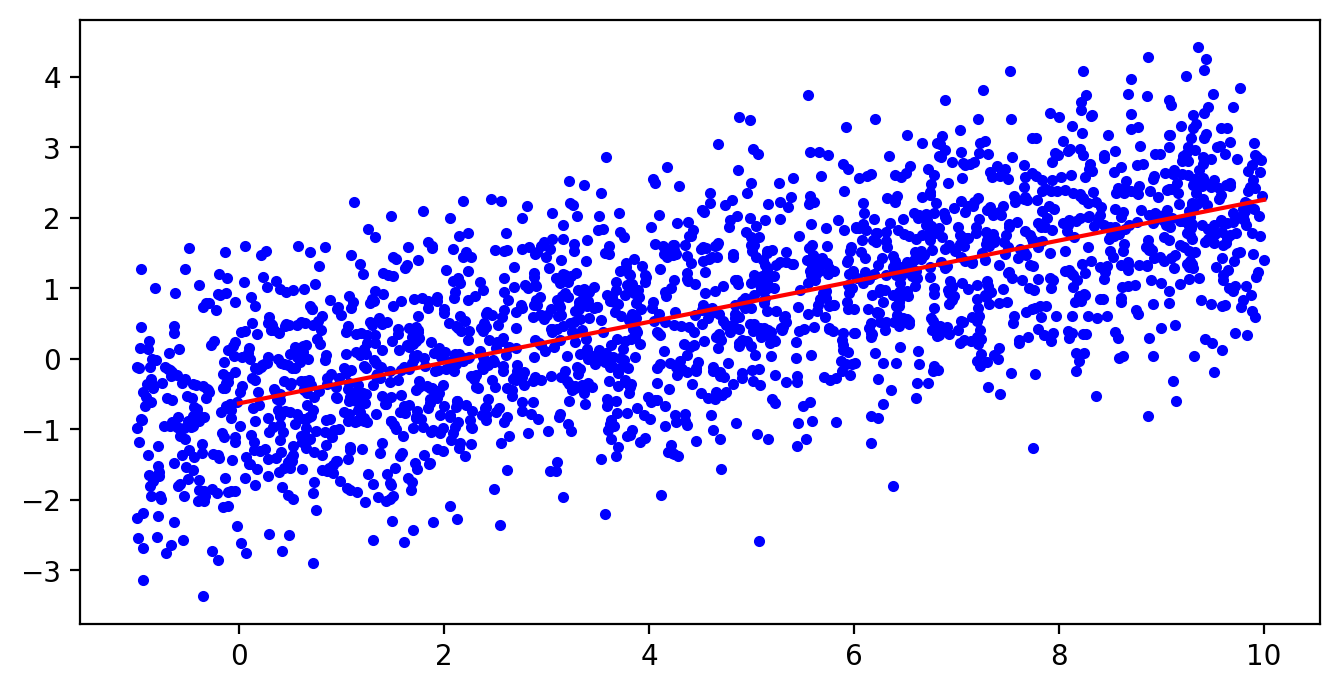

In [40]:
# Sample answer
from sklearn.linear_model import LinearRegression

with open('linnoise.dat') as f:
    lines = f.readlines()
    X =  np.array([float(x.split(',')[0]) for x in lines])
    y  = np.array([float(y.split(',')[1]) for y in lines])

X.shape=(X.shape[0],1)    

reg = LinearRegression().fit(X, y)    

plt.plot(X,y,'b.')

x=np.linspace(0,10,100)
fitresult=reg.intercept_ + reg.coef_[0]*x
plt.plot(x,fitresult,'r-')

**Exercise 2**

The webpage describing *scikit-learn*'s LinearRegression object does not mention basis functions. Is this a problem? Can you use this object to fit the data from *cubnoise.dat*? If so, do so.

1.0398025271566018
[ 0.         -2.09835585 -5.05924827  2.03067637]


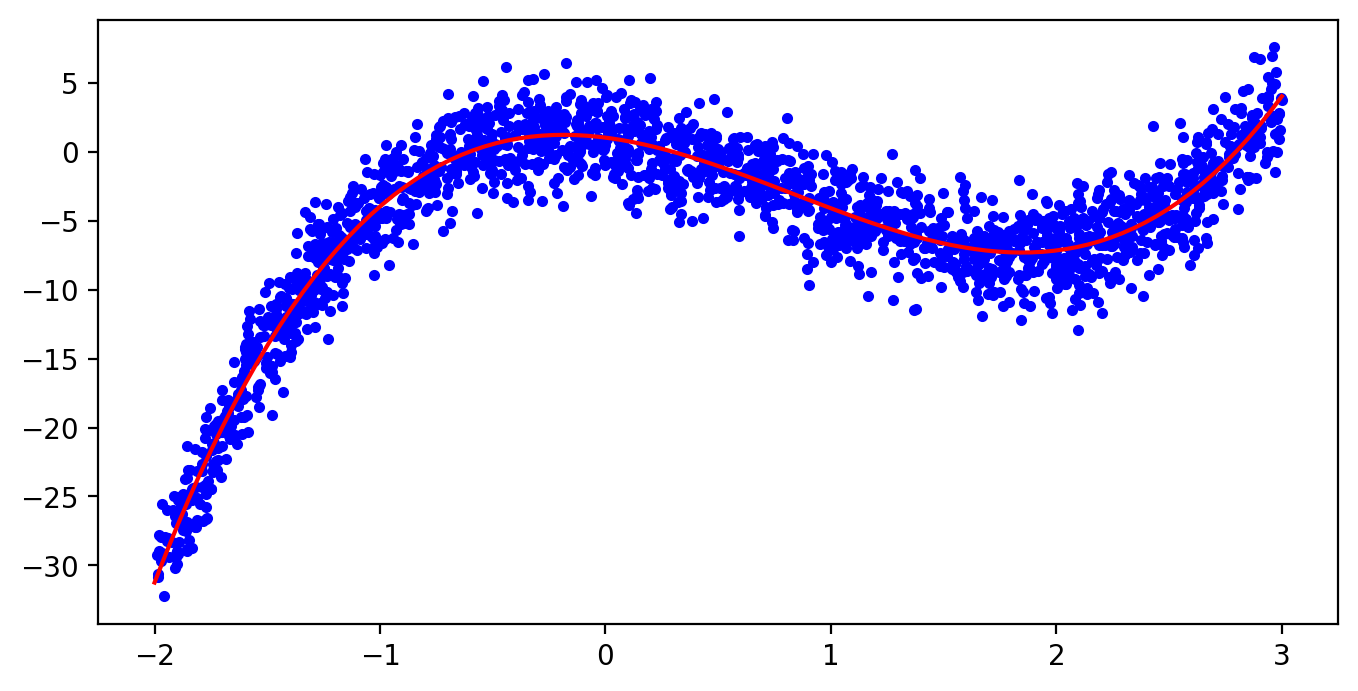

In [62]:
with open('cubnoise.dat') as f:
    lines = f.readlines()
    x =  np.array([float(x.split(',')[0]) for x in lines])
    y  = np.array([float(y.split(',')[1]) for y in lines])
    

X=np.vstack([x**0,x**1,x**2,x**3]).T
reg = LinearRegression().fit(X, y) 

plt.plot(x,y,'b.')

print(reg.intercept_)
print(reg.coef_)

xvals=np.linspace(-2,3,100)

yvals=reg.coef_[3]*xvals**3+reg.coef_[2]*xvals**2+reg.coef_[1]*xvals+reg.intercept_
plt.plot(xvals,yvals,'r-')